In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=3 , encoding='cp949')
#df = df.dropna() # 누락값이 있는 행은 버림
df0 = df.drop(0) # 좌측에 0(index) 이라고 써진 행을 버려라
df0 = df0.replace(',','',regex=True)
df0.head(1)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
1,2019-05,1호선,150.0,서울역,1148,21,11958,10579,15684,61286,...,22083,4127,7762,3,548,0,0,0,0,2019-06-03 10:56:25


### 출근 시간대에 사람들이 많이 타고 내리는 역은 어딜까?
 - 출근 시간대는 언제인가? 새벽 ~ 오전9시
 - 타는 역과 내리는 역
 - 상위 10개 역 : 정렬해서 큰 수 10개를 자른다.(mask로 조건부 검색)

In [30]:
출근시간시작위치 = 4
출근시간끝위치 = 13
arr = np.array(df0)
arr.shape

(597, 53)

In [24]:
역이름 = arr[:,3]
역별승차인원 = arr[:, 출근시간시작위치:출근시간끝위치:2].astype(np.int)
역별하차인원 = arr[:, 1+출근시간시작위치:1+출근시간끝위치:2].astype(np.int)
역별승차인원합 = np.sum(역별승차인원, axis=1)
역별하차인원합 = np.sum(역별하차인원, axis=1)
역별승차인원합[0],역별하차인원합[0]

(162732, 425823)

In [35]:
k = 10
threshold = np.sort(역별승차인원합)[-k] # 기준값
threshold_1 = np.sort(역별하차인원합)[-k] # 기준값
threshold, threshold_1

(382801, 425823)

In [36]:
mask = 역별승차인원합 >= threshold
mask_1 = 역별하차인원합 >= threshold_1
역별승차인원합[mask], 역이름[mask], 역별하차인원합[mask_1], 역이름[mask_1]

(array([412219, 454340, 759642, 490300, 444523, 454963, 412919, 382801,
        389612, 413462]),
 array(['잠실(송파구청)', '서울대입구(관악구청)', '신림', '구로디지털단지', '신도림', '연신내', '쌍문',
        '수유(강북구청)', '화곡', '까치산'], dtype=object),
 array([425823, 442470, 522850, 565573, 490141, 561074, 634417, 444935,
        449314, 560341]),
 array(['서울역', '종각', '을지로입구', '삼성(무역센터)', '선릉', '역삼', '강남', '양재(서초구청)',
        '광화문(세종문화회관)', '가산디지털단지'], dtype=object))

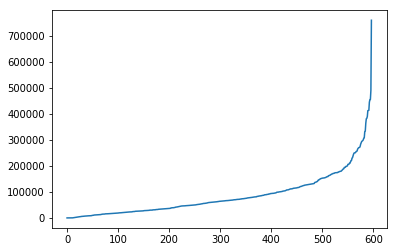

In [33]:
m = plt.plot(np.sort(역별승차인원합))

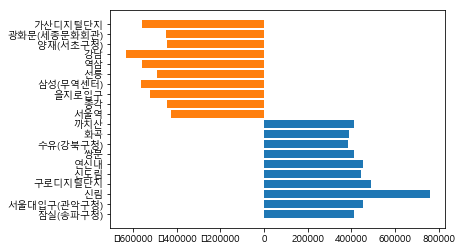

In [39]:
plt.rc('font', family='Malgun Gothic')
m = plt.barh(역이름[mask], 역별승차인원합[mask])
m = plt.barh(역이름[mask_1], -역별하차인원합[mask_1])

# 밤 11시에 사람들이 많이 타는 역 10개는 어디일까요?

In [53]:
#밤11시시작위치 = -11
밤11시역별승차인원 = arr[:, -11].astype(np.int)
#밤11시역별승차인원
threshold_23 = np.sort(밤11시역별승차인원)[-k] # 기준값

In [54]:
mask_23 = 밤11시역별승차인원 >= threshold_23
밤11시역별승차인원[mask_23], 역이름[mask_23]

(array([ 48067,  78429,  48786, 128937,  50264,  42696, 151504,  74678,
         55240,  43998]),
 array(['종각', '건대입구', '잠실(송파구청)', '강남', '사당', '합정', '홍대입구', '신촌', '혜화',
        '명동'], dtype=object))

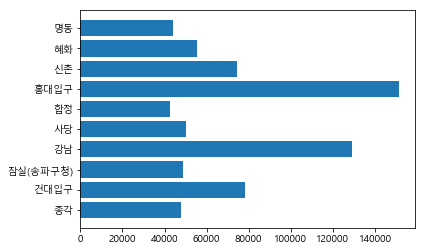

In [55]:
plt.rc('font', family='Malgun Gothic')
m = plt.barh(역이름[mask_23], 밤11시역별승차인원[mask_23])